In [3]:
import pm4py

In [6]:
log_loan_application_process = pm4py.read_xes("C:/Studium/IT Kennzahlen Benchmarking/BPI Challenge 2017.xes")
log_loan_application_process

parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

Action org:resource            concept:name  EventOrigin  \
0            Created       User_1    A_Create Application  Application   
1        statechange       User_1             A_Submitted  Application   
2            Created       User_1          W_Handle leads     Workflow   
3            Deleted       User_1          W_Handle leads     Workflow   
4            Created       User_1  W_Complete application     Workflow   
...              ...          ...                     ...          ...   
1202262      Deleted       User_1     W_Call after offers     Workflow   
1202263      Created       User_1     W_Call after offers     Workflow   
1202264  statechange      User_28             A_Cancelled  Application   
1202265  statechange      User_28             O_Cancelled        Offer   
1202266      Deleted      User_28     W_Call after offers     Workflow   

                       EventID lifecycle:transition  \
0        Application_652823628             complete   
1         ApplState_1582051990             complete   
2          Workitem_1298499574             schedule   
3          Workitem_1673366067             withdraw   
4          Workitem_1493664571             schedule   
...                        ...                  ...   
1202262    Workitem_1817549786            ate_abort   
1202263     Workitem_363876066             schedule   
1202264   ApplState_1869071797             complete   
1202265   OfferState_420066181             complete   
1202266    Workitem_1934044935             withdraw   

                          time:timestamp           case:LoanGoal  \
0       2016-01-01 09:51:15.304000+00:00  Existing loan takeover   
1       2016-01-01 09:51:15.352000+00:00  Existing loan takeover   
2       2016-01-01 09:51:15.774000+00:00  Existing loan takeover   
3       2016-01-01 09:52:36.392000+00:00  Existing loan takeover   
4       2016-01-01 09:52:36.403000+00:00  Existing loan takeover   
...                                  ...                     ...   
1202262 2017-01-06 06:33:02.212000+00:00        Home improvement   
1202263 2017-01-06 06:33:02.221000+00:00        Home improvement   
1202264 2017-01-16 09:51:21.114000+00:00        Home improvement   
1202265 2017-01-16 09:51:21.139000+00:00        Home improvement   
1202266 2017-01-16 09:51:21.146000+00:00        Home improvement   

        case:ApplicationType       case:concept:name  case:RequestedAmount  \
0                 New credit   Application_652823628               20000.0   
1                 New credit   Application_652823628               20000.0   
2                 New credit   Application_652823628               20000.0   
3                 New credit   Application_652823628               20000.0   
4                 New credit   Application_652823628               20000.0   
...                      ...                     ...                   ...   
1202262           New credit  Application_1350494635               20000.0   
1202263           New credit  Application_1350494635               20000.0   
1202264           New credit  Application_1350494635               20000.0   
1202265           New credit  Application_1350494635               20000.0   
1202266           New credit  Application_1350494635               20000.0   

         FirstWithdrawalAmount  NumberOfTerms Accepted  MonthlyCost Selected  \
0                          NaN            NaN      NaN          NaN      NaN   
1                          NaN            NaN      NaN          NaN      NaN   
2                          NaN            NaN      NaN          NaN      NaN   
3                          NaN            NaN      NaN          NaN      NaN   
4                          NaN            NaN      NaN          NaN      NaN   
...                        ...            ...      ...          ...      ...   
1202262                    NaN            NaN      NaN          NaN      NaN   
1202263                    NaN            NaN      NaN          NaN   

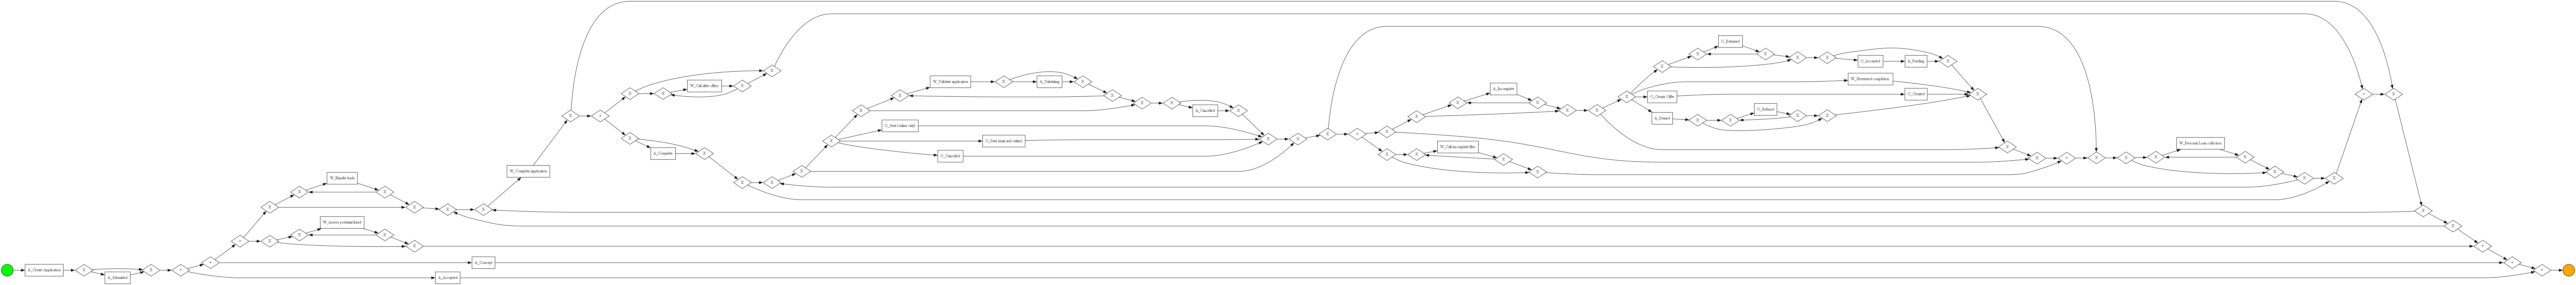

In [8]:
bpmn_graph_loan_application_process = pm4py.discover_bpmn_inductive(log_loan_application_process)
pm4py.vis.view_bpmn(bpmn_graph_loan_application_process)

# Der untersuchte Prozess beinhaltet einige Varianten

In [19]:
df_loan_application_process = pm4py.convert_to_dataframe(log_loan_application_process)



cases = pm4py.stats.get_start_activities(log_loan_application_process)
num_events = len(df_loan_application_process)
num_cases = len(cases)

process_variants = pm4py.stats.get_variants_as_tuples(df_loan_application_process)
num_variants = len(process_variants)

print(num_events)

print(num_variants)

1202267
15930


In [15]:
print(type(df_loan_application_process))

<class 'pandas.core.frame.DataFrame'>


In [33]:
pm4py.stats.get_event_attributes(log_loan_application_process)

['Action',
 'org:resource',
 'concept:name',
 'EventOrigin',
 'EventID',
 'lifecycle:transition',
 'time:timestamp',
 'case:LoanGoal',
 'case:ApplicationType',
 'case:concept:name',
 'case:RequestedAmount',
 'FirstWithdrawalAmount',
 'NumberOfTerms',
 'Accepted',
 'MonthlyCost',
 'Selected',
 'CreditScore',
 'OfferedAmount',
 'OfferID']

In [32]:
pm4py.stats.get_trace_attributes(log_loan_application_process)

['case:LoanGoal',
 'case:ApplicationType',
 'case:concept:name',
 'case:RequestedAmount']

In [37]:
len(log_loan_application_process['case:concept:name'].unique())

31509

In [34]:
len(log_loan_application_process['case:concept:name'])

1202267

In [97]:
pm4py.stats.get_start_activities(log_loan_application_process)

{'A_Create Application': 31509}

In [80]:
filtered_log_loan_application_process_pending = pm4py.filter_trace_attribute_values(log_loan_application_process, 'concept:name', ['A_Pending'], case_id_key='case:concept:name')
len(filtered_log_loan_application_process_pending)

779168

In [98]:
pm4py.stats.get_start_activities(filtered_log_loan_application_process_pending)

{'A_Create Application': 17228}

In [81]:
import statistics

def convert(seconds):

    MINUTE = 60
    HOUR = MINUTE * 60
    DAY = HOUR * 24

    days = seconds // DAY
    seconds = seconds % DAY

    hours = seconds // HOUR
    seconds = seconds % HOUR

    minutes = seconds // MINUTE
    seconds = seconds % MINUTE
    
    return "%d Tage %d:%02d:%02d" % (days, hours, minutes, seconds) 


case_durations_all = pm4py.get_all_case_durations(log_loan_application_process)
case_durations_all = statistics.mean(case_durations_all)
duration_all = convert(case_durations_all)

case_durations_100 = pm4py.get_all_case_durations(log_filtered_loan_application_process_top)
case_durations_100 = statistics.mean(case_durations_100)
duration_100 = convert(case_durations_100)

print("Der Prozess dauer im Durchschnitt so lange:")





Der Prozess dauer im Durchschnitt so lange:


In [ ]:

import csv

data = [
    ["\\", "Alle", "100"],
    ["case duration", duration_all, duration_100 ]
]

with open('C:/Studium/IT Kennzahlen Benchmarking/auswertung.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in data:
        writer.writerow(row)

In [46]:
import pandas
pandas.read_csv('C:/Studium/IT Kennzahlen Benchmarking/auswertung.csv')

\              Alle              100
0  case duration  21 Tage 21:35:25  22 Tage 3:27:10

# Not needed just for experimenting

In [23]:
end_activities = pm4py.stats.get_end_activities(log_loan_application_process)
end_activities

{'W_Validate application': 12662,
 'W_Call after offers': 9457,
 'W_Call incomplete files': 4676,
 'O_Cancelled': 4436,
 'W_Complete application': 144,
 'W_Assess potential fraud': 102,
 'O_Sent (mail and online)': 15,
 'O_Sent (online only)': 8,
 'W_Shortened completion ': 5,
 'W_Personal Loan collection': 2,
 'A_Denied': 1,
 'O_Returned': 1}

In [25]:
start_activities = pm4py.stats.get_start_activities(log_loan_application_process)
start_activities

{'A_Create Application': 31509}

In [26]:
event_attributes = pm4py.stats.get_event_attributes(log_loan_application_process)
event_attributes

['Action',
 'org:resource',
 'concept:name',
 'EventOrigin',
 'EventID',
 'lifecycle:transition',
 'time:timestamp',
 'case:LoanGoal',
 'case:ApplicationType',
 'case:concept:name',
 'case:RequestedAmount',
 'FirstWithdrawalAmount',
 'NumberOfTerms',
 'Accepted',
 'MonthlyCost',
 'Selected',
 'CreditScore',
 'OfferedAmount',
 'OfferID']

In [10]:
process_variants

{('A_Create Application',
  'A_Submitted',
  'W_Handle leads',
  'W_Handle leads',
  'W_Complete application',
  'A_Concept',
  'W_Complete application',
  'W_Complete application',
  'A_Accepted',
  'O_Create Offer',
  'O_Created',
  'O_Sent (mail and online)',
  'W_Complete application',
  'W_Call after offers',
  'W_Call after offers',
  'A_Complete',
  'W_Call after offers',
  'W_Call after offers',
  'W_Call after offers',
  'A_Cancelled',
  'O_Cancelled',
  'W_Call after offers'): 734,
 ('A_Create Application',
  'A_Submitted',
  'W_Handle leads',
  'W_Handle leads',
  'W_Complete application',
  'A_Concept',
  'W_Complete application',
  'A_Accepted',
  'O_Create Offer',
  'O_Created',
  'O_Sent (mail and online)',
  'W_Complete application',
  'W_Call after offers',
  'W_Call after offers',
  'A_Complete',
  'W_Call after offers',
  'W_Call after offers',
  'W_Validate application',
  'W_Validate application',
  'A_Validating',
  'O_Returned',
  'W_Validate application',
  'O_A

In [31]:
case_arrival_average = pm4py.stats.get_case_arrival_average(log_loan_application_process)
case_arrival_average

1001.735717912911

In [30]:
variants_as_tuples = pm4py.stats.get_variants_as_tuples(log_loan_application_process)
variants_as_tuples

{('A_Create Application',
  'A_Submitted',
  'W_Handle leads',
  'W_Handle leads',
  'W_Complete application',
  'A_Concept',
  'W_Complete application',
  'W_Complete application',
  'A_Accepted',
  'O_Create Offer',
  'O_Created',
  'O_Sent (mail and online)',
  'W_Complete application',
  'W_Call after offers',
  'W_Call after offers',
  'A_Complete',
  'W_Call after offers',
  'W_Call after offers',
  'W_Call after offers',
  'A_Cancelled',
  'O_Cancelled',
  'W_Call after offers'): 734,
 ('A_Create Application',
  'A_Submitted',
  'W_Handle leads',
  'W_Handle leads',
  'W_Complete application',
  'A_Concept',
  'W_Complete application',
  'A_Accepted',
  'O_Create Offer',
  'O_Created',
  'O_Sent (mail and online)',
  'W_Complete application',
  'W_Call after offers',
  'W_Call after offers',
  'A_Complete',
  'W_Call after offers',
  'W_Call after offers',
  'W_Validate application',
  'W_Validate application',
  'A_Validating',
  'O_Returned',
  'W_Validate application',
  'O_A

In [4]:
variants_as_tuples_filtered_top = pm4py.stats.get_variants_as_tuples(filtered_log_loan_application_process_top)
len(variants_as_tuples_filtered_top)


NameError: name 'filtered_log_loan_application_process_top' is not defined

In [34]:
dataframe = pm4py.convert_to_dataframe(log_loan_application_process)
rework_cases_per_activity = pm4py.get_rework_cases_per_activity(dataframe, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
rework_cases_per_activity

C:\Users\hbru\Anaconda3\lib\site-packages\pm4py\statistics\rework\pandas\get.py:59: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df[{activity_key, case_id_key}]


{'A_Denied': 1,
 'A_Incomplete': 5686,
 'A_Validating': 11669,
 'O_Cancelled': 3867,
 'O_Create Offer': 8559,
 'O_Created': 8559,
 'O_Refused': 777,
 'O_Returned': 1493,
 'O_Sent (mail and online)': 6834,
 'O_Sent (online only)': 171,
 'W_Assess potential fraud': 303,
 'W_Call after offers': 31362,
 'W_Call incomplete files': 15003,
 'W_Complete application': 31509,
 'W_Handle leads': 20423,
 'W_Personal Loan collection': 2,
 'W_Shortened completion ': 74,
 'W_Validate application': 21870}

In [63]:
directly_follow_graph, start_activities, end_activities = pm4py.discover_dfg(log_loan_application_process)

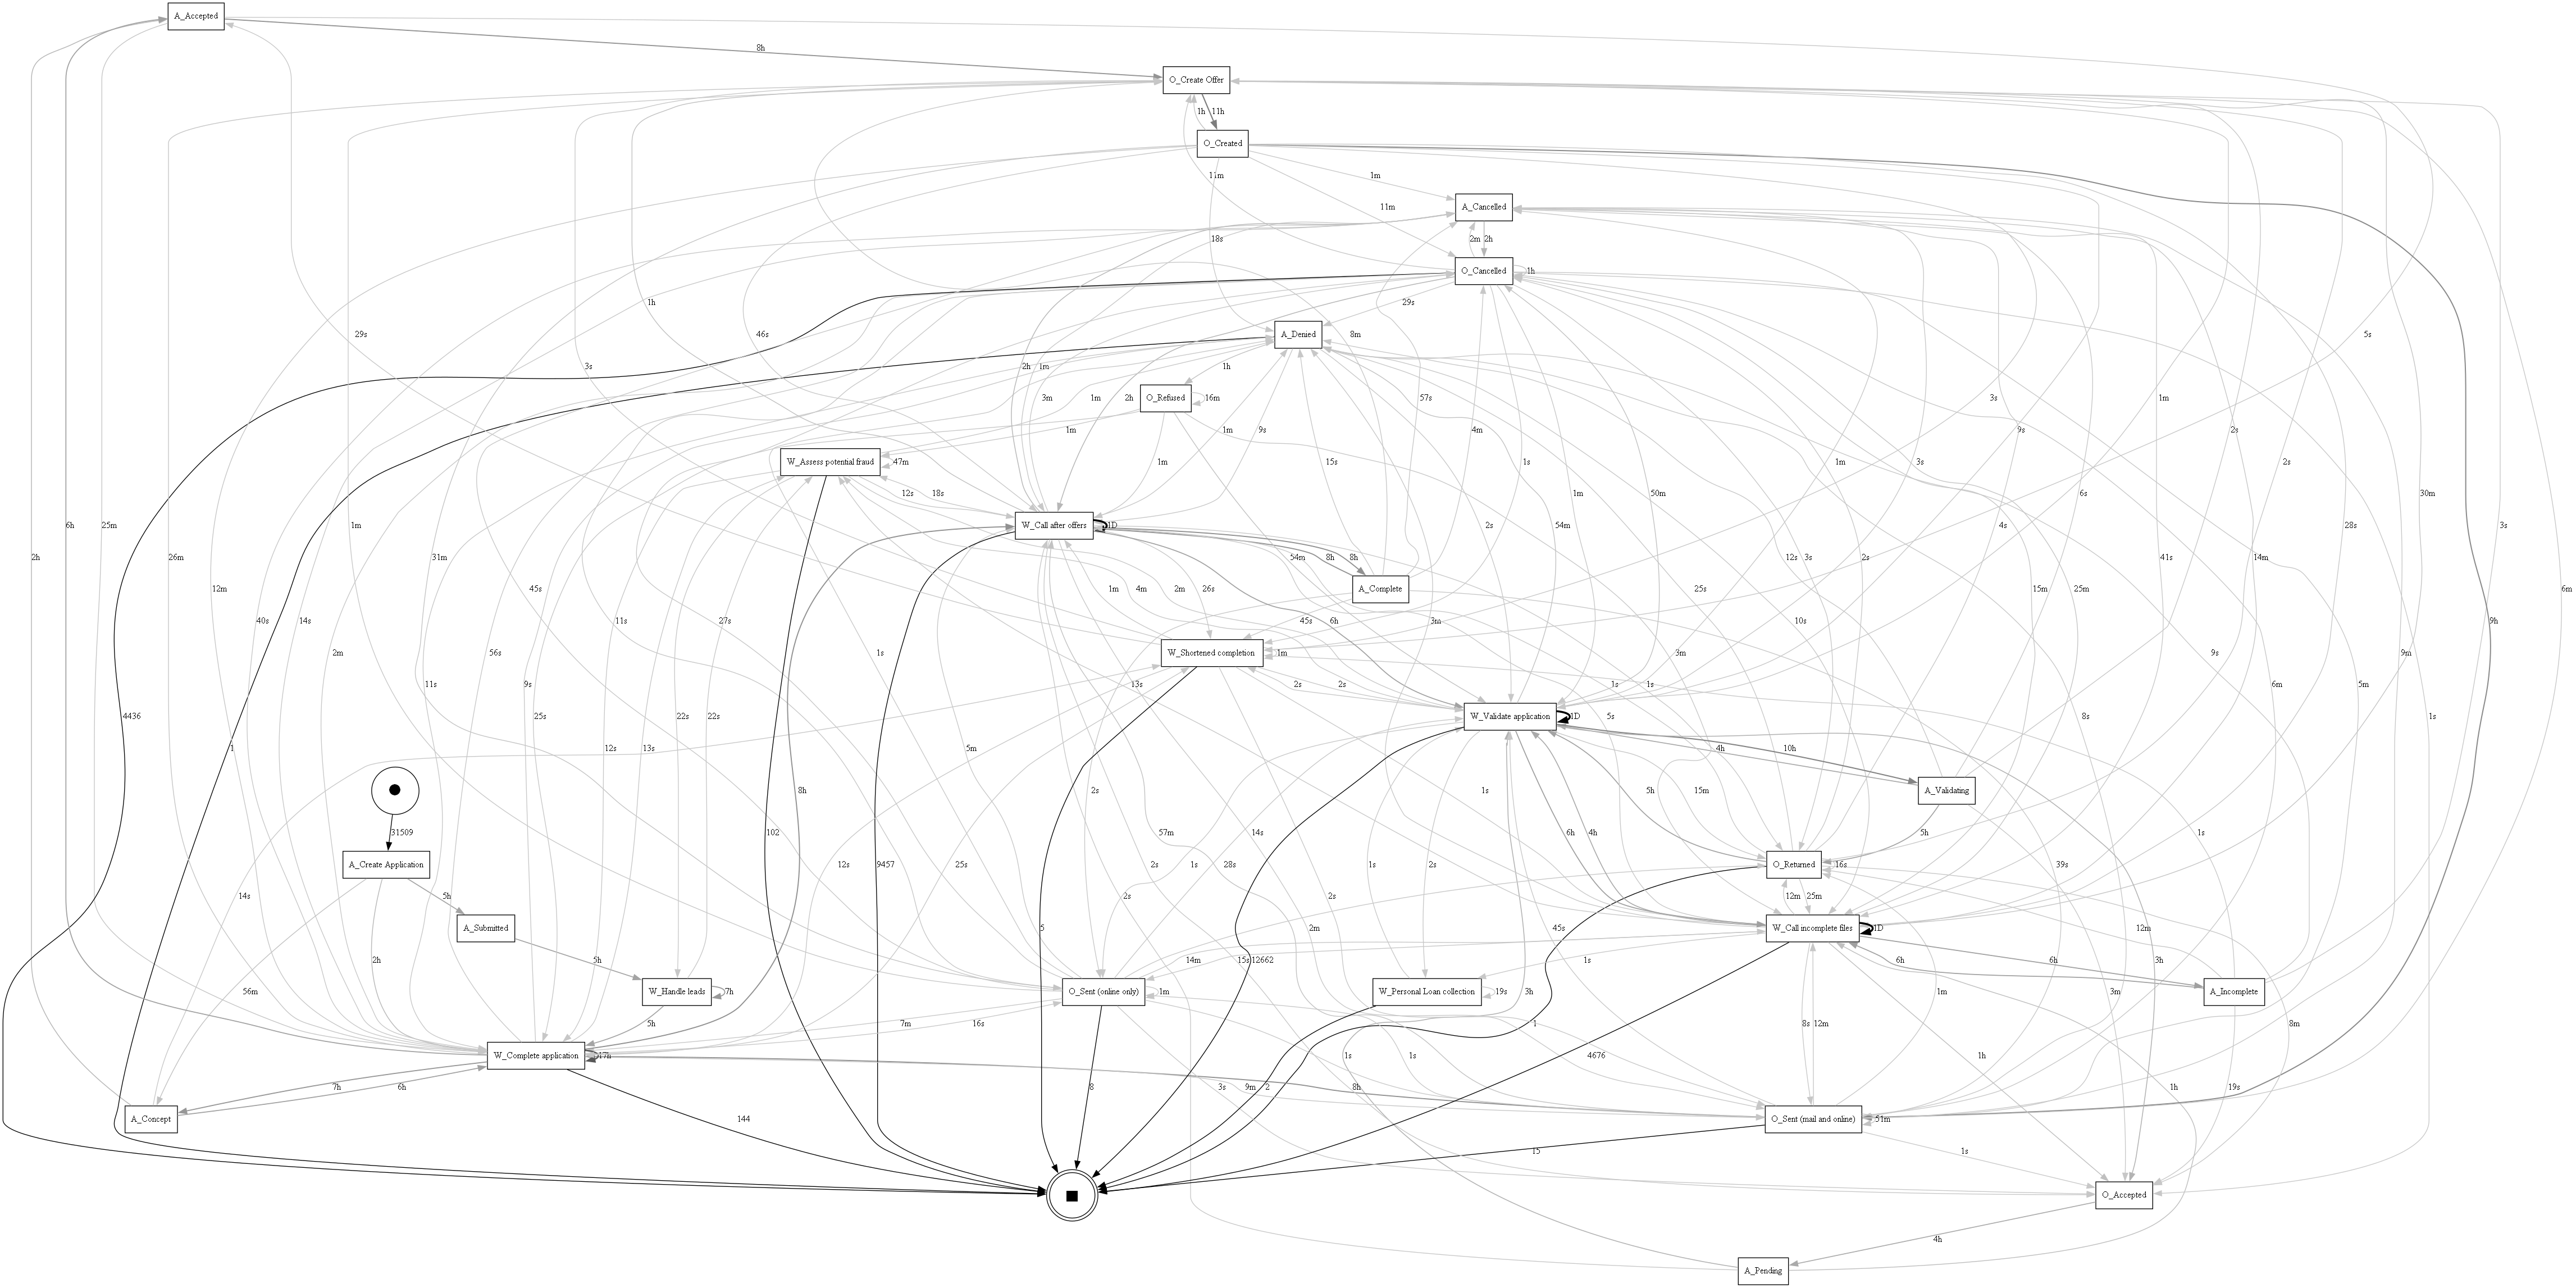

In [66]:
pm4py.vis.view_performance_dfg(directly_follow_graph, start_activities, end_activities)

C:\Users\hbru\AppData\Local\Temp\ipykernel_4684\2446146856.py:1: DeprecatedWarning: view_dotted_chart is deprecated as of 2.3.0 and will be removed in 3.0.0. the dotted chart visualization will be removed in a future release.
  pm4py.view_dotted_chart(log_loan_application_process, 'png')


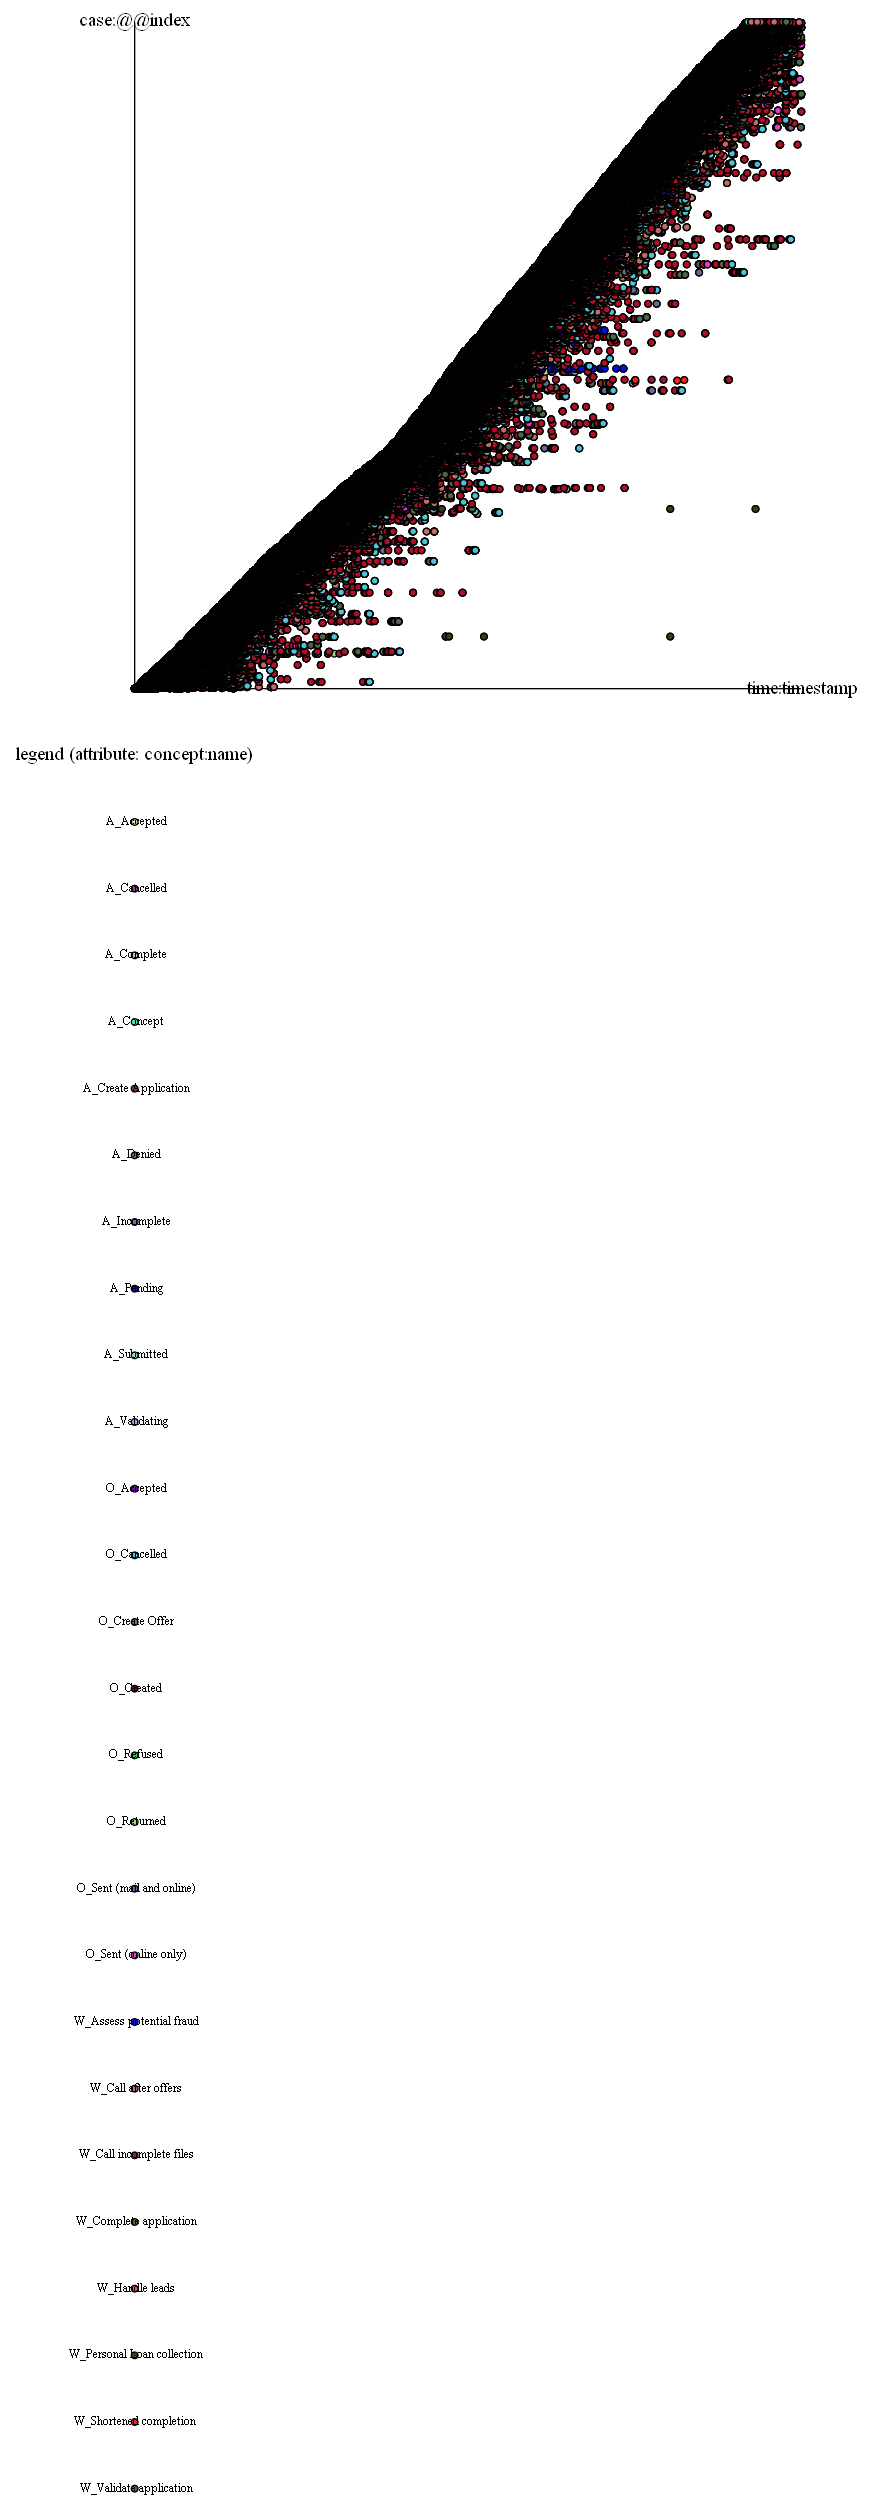

In [69]:
pm4py.view_dotted_chart(log_loan_application_process)

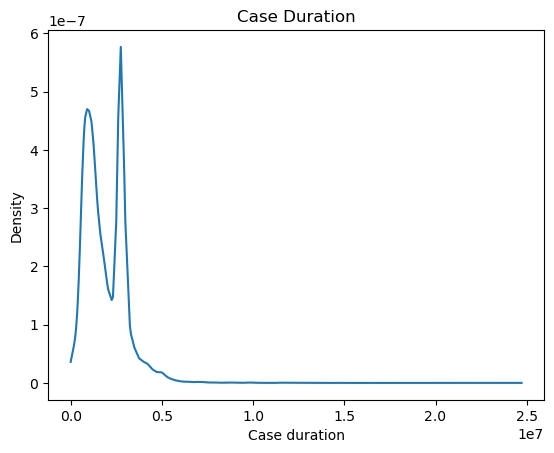

In [70]:
pm4py.view_case_duration_graph(log_loan_application_process)

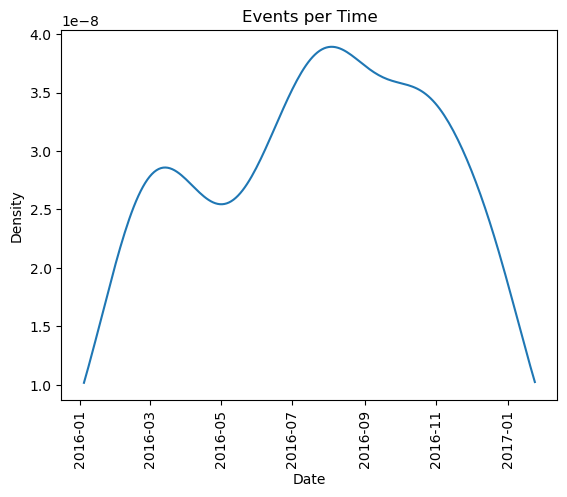

In [71]:
pm4py.view_events_per_time_graph(log_loan_application_process)

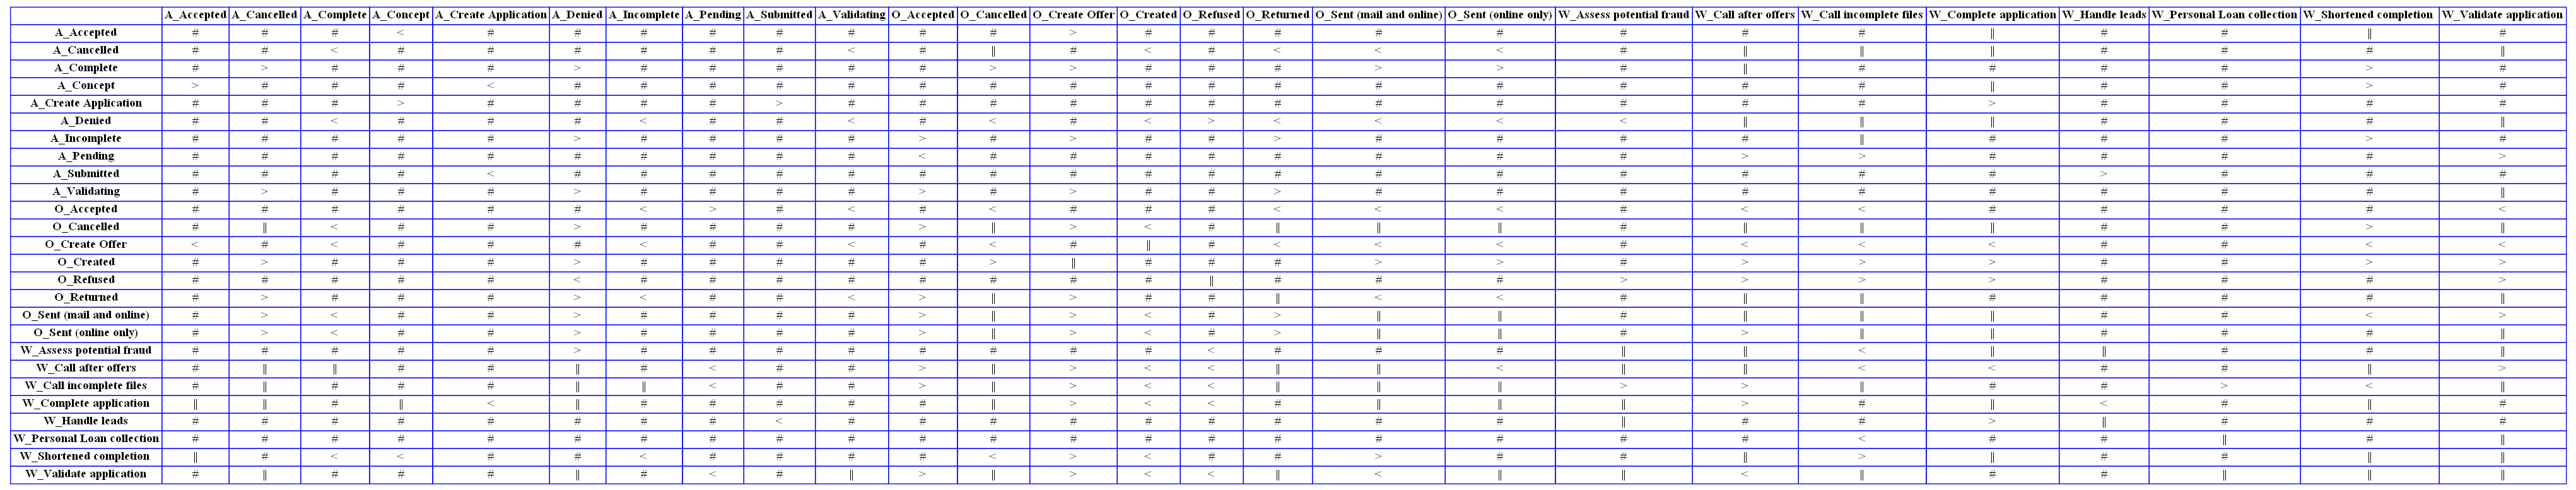

In [72]:
footprints = pm4py.discover_footprints(log_loan_application_process)
pm4py.vis.view_footprints(footprints)

In [30]:
log_filtered_loan_application_process_top = pm4py.filter_variants_top_k(log_loan_application_process, 12000)
process_frequent_variants = pm4py.stats.get_variants_as_tuples(log_filtered_loan_application_process_top);
len(process_frequent_variants)

12000